In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("WB_population_cleaned.csv")

In [3]:
df.describe(include='all')

,iso3,country,year,population
count,16935,17195,17195.000000,1.719500e+04
unique,261,265,NaN,NaN
top,ZWE,Zimbabwe,NaN,NaN
freq,65,65,NaN,NaN
mean,NaN,NaN,1992.030532,2.182379e+08
std,NaN,NaN,18.760828,7.142151e+08
min,NaN,NaN,1960.000000,2.715000e+03
25%,NaN,NaN,1976.000000,1.019463e+06
50%,NaN,NaN,1992.000000,6.790788e+06
75%,NaN,NaN,2008.000000,4.706578e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17195 entries, 0 to 17194
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3        16935 non-null  object 
 1   country     17195 non-null  object 
 2   year        17195 non-null  int64  
 3   population  17195 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 537.5+ KB


In [5]:
df.isnull().sum()

iso3          260
country         0
year            0
population      0
dtype: int64

In [6]:
df.columns

Index(['iso3', 'country', 'year', 'population'], dtype='object')

In [7]:
df = df.dropna(subset=["iso3"])

In [8]:
df.isnull().sum()

iso3          0
country       0
year          0
population    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(16935, 4)

In [11]:
df["iso3"].nunique()

261

In [12]:
df["country"].unique()[:15]

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations'], dtype=object)

In [13]:
(df["country"] == "World").sum()

np.int64(65)

In [14]:
world_df = df[df["country"] == "World"]

In [15]:
regions = [
    "Africa Eastern and Southern",
    "East Asia & Pacific",
    "Europe & Central Asia",
    "Latin America & Caribbean"
]

region_df = df[df["country"].isin(regions)]

In [16]:
countries = ["India", "China", "United States", "Nigeria"]

country_df = df[df["country"].isin(countries)]

In [17]:
df = df.sort_values(["country" , "year"])

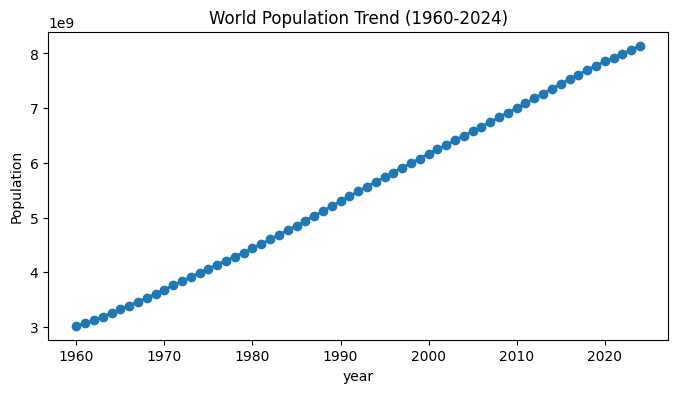

In [18]:

plt.figure(figsize=(8,4))
plt.plot(world_df["year"] , world_df["population"],marker = 'o',linewidth = 2)
plt.title("World Population Trend (1960-2024)")
plt.xlabel("year")
plt.ylabel("Population")
plt.show()

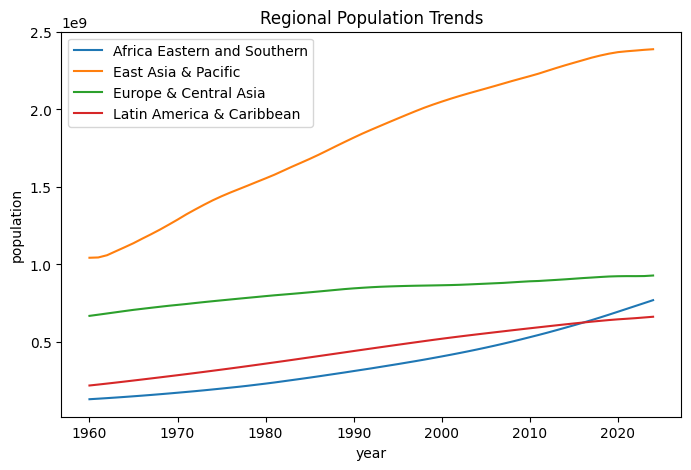

In [19]:
plt.figure(figsize=(8,5))

for region in regions:
    temp = region_df[region_df["country"] == region]
    plt.plot(temp["year"], temp["population"] , label = region)

plt.legend()
plt.title("Regional Population Trends")
plt.xlabel("year")
plt.ylabel("population")
plt.show()

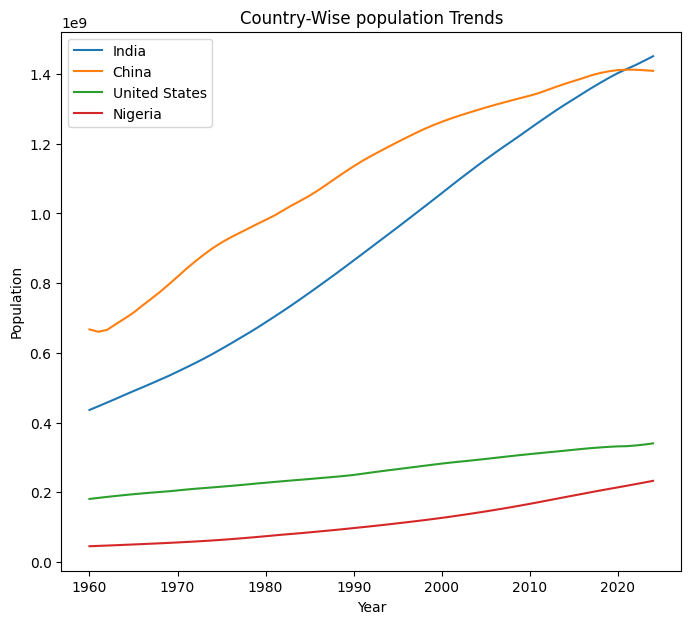

In [20]:
plt.figure(figsize = (8,7))

for c in countries:
    temp = country_df[country_df["country"] == c]
    plt.plot(temp["year"],temp["population"] , label = c)

plt.legend()
plt.title("Country-Wise population Trends")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [21]:
world_df = world_df.sort_values("year")

In [22]:
world_df.loc[:,"growth_rate"] = world_df["population"].pct_change()*100

In [23]:
world_df[["year","population" , "growth_rate"]] .head()

,year,population,growth_rate
3119,1960,3.021513e+09,NaN
3118,1961,3.062768e+09,1.365393
3117,1962,3.117372e+09,1.782834
3116,1963,3.184063e+09,2.139329
3115,1964,3.251253e+09,2.110202


<function matplotlib.pyplot.show(close=None, block=None)>

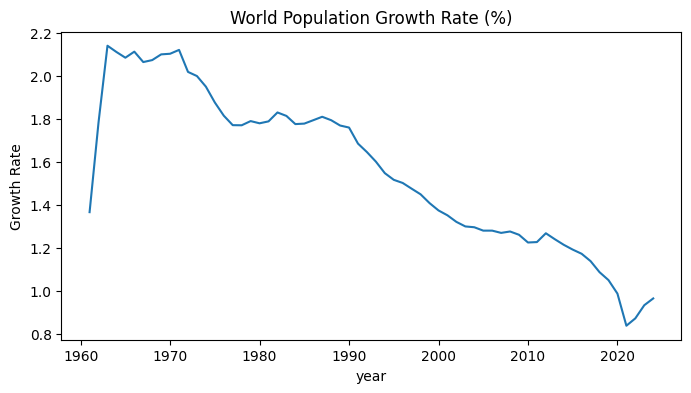

In [24]:
plt.figure(figsize=(8,4))
plt.plot(world_df["year"] ,  world_df["growth_rate"])
plt.title("World Population Growth Rate (%)")
plt.xlabel("year")
plt.ylabel("Growth Rate")
plt.show

In [25]:
region_df = region_df.sort_values(["country" , "year"])
region_df["growth_rate"] = (
    region_df.groupby("country")["population"].pct_change()*100)

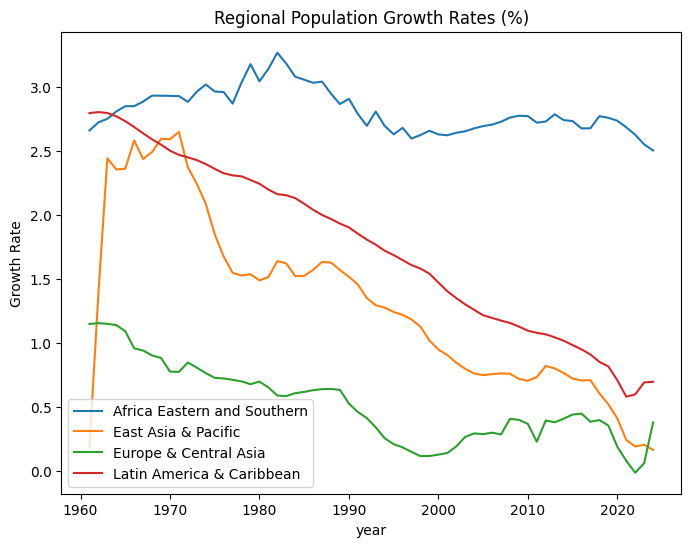

In [26]:
plt.figure(figsize=(8,6))

for region in regions: 
    temp = region_df[region_df["country"] == region]
    plt.plot(temp["year"], temp["growth_rate"], label=region)


plt.legend()
plt.title("Regional Population Growth Rates (%)")
plt.xlabel("year")
plt.ylabel("Growth Rate")
plt.show()

Country-Level Growth Rate .....Why country-level?

Captures national policies

Reflects development stage

Highlights demographic transitions

In [27]:
country_df = country_df.sort_values(["country" , "year"])

country_df["growth_rate"] = (country_df.groupby("country")["population"].pct_change()*100)

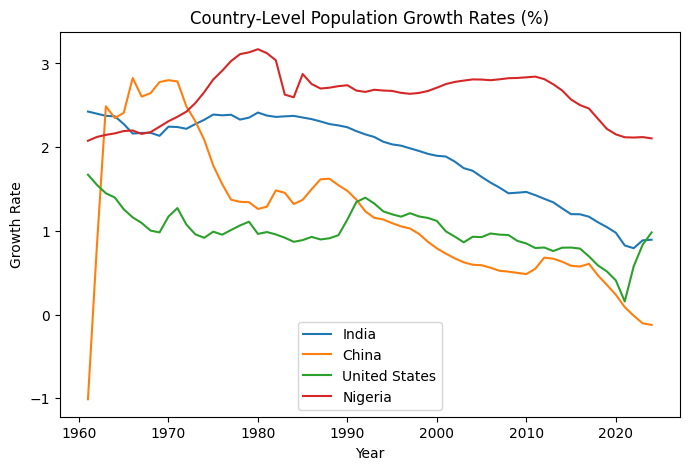

In [28]:
plt.figure(figsize=(8,5))

for c in countries:
    temp = country_df[country_df["country"] == c]
    plt.plot(temp["year"], temp["growth_rate"], label=c)

plt.legend()
plt.title("Country-Level Population Growth Rates (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.show()

Forecasting on world Population becouse forecasting implement on one entity only

In [29]:
world_df = df[df["country"] == "World"].copy()
world_df = world_df.sort_values("year")

Time-Series Models need time index before training Forecast model

In [30]:
world_df["year"]= pd.to_datetime(world_df["year"],format="%Y")
world_df = world_df.set_index("year")

Visualize Before Modelling

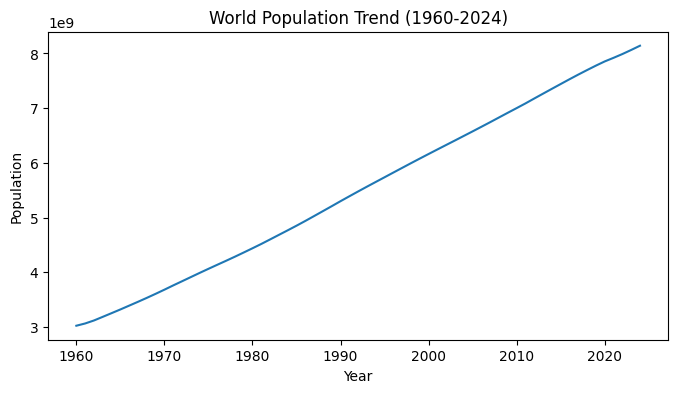

In [31]:
plt.figure(figsize=(8,4))
plt.plot(world_df.index , world_df["population"])
plt.title("World Population Trend (1960-2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

Train-Test-Split....Predicting future with past data

In [32]:
train = world_df.loc[:"2010"]
test = world_df.loc["2011":]

In [33]:
naive_pred = [train["population"].iloc[-1]]*len(test)

In [34]:
window = 5  ## taking average of each 5 years 
ma_pred = train["population"].rolling(window).mean().iloc[-1]
ma_pred = [ma_pred]*len(test)

Using ARIMA Model best for Forecast

AR - PAST VALUE
I - TREND REMOVAL
MA - PAST ERROR
ARIMA IS A STATISTICAL MODEL WHICH USE PAST TREND AND PAST ERROR TO PREDICT FUTURE # ARIMA HAS 3 PARTS 1 A = AUTOREGRESSIVE (AR) I = INTEGRATED (Differencing) M A = Moving average (of errors)

Understanding ARIMA(p, d, q)¶
ARIMA is a classical time-series forecasting model that combines past values, trend adjustment, and past prediction errors to estimate future values.

ARIMA Components
ARIMA consists of three parameters:

p (AutoRegressive order)
Controls how many past observations the model uses.

p = 1 → uses the most recent value
p = 2 → uses the last two values
p = 3 → uses the last three values
Higher values of p make the model smoother but slower to react to sudden changes.

d (Differencing order)
Indicates how many times the data is differenced to remove trend and make the series stationary.

d = 0 → no differencing (used only when data has no trend)
d = 1 → first-order differencing (most common)
d = 2 → second-order differencing (used when the trend itself is changing)
q (Moving Average order)
Determines how many past forecast errors are used to adjust current predictions.

q = 1 → adjusts using the last prediction error
q = 2 → uses the last two errors
q = 3 → uses the last three errors
Higher values of q help smooth noise but can lead to overfitting.

Interpreting ARIMA(1,1,1)
An ARIMA(1,1,1) model means:

The model depends on the previous value (p = 1)
The data is differenced once to remove trend (d = 1)
The previous prediction error is used for adjustment (q = 1)
This configuration is commonly used because it balances simplicity with the ability to capture trend and short-term fluctuations.

Key Takeaway
p controls reliance on past values
d removes trend to stabilize the series
q corrects predictions using past errors
ARIMA models are especially effective for short-term forecasting where trends and temporal dependencies are present.

FIT ARIMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train["population"], order = (1,1,1))
arima_fit = arima_model.fit()

C:\Users\GOWTHAM\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\GOWTHAM\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\GOWTHAM\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\GOWTHAM\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GOWTHAM\AppData\Roaming\Py

In [36]:
arima_pred = arima_fit.forecast(steps=len(test))

Plotting ARIMA Forecast

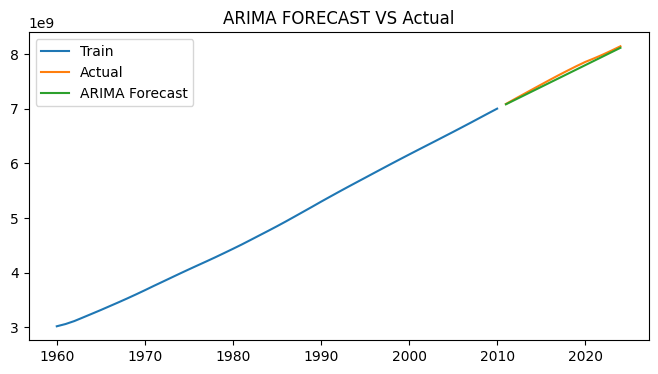

In [37]:
plt.figure(figsize=(8,4))
plt.plot(train.index , train["population"], label = "Train")
plt.plot(test.index, test["population"] ,  label = "Actual")
plt.plot(test.index, arima_pred, label ="ARIMA Forecast")
plt.legend()
plt.title("ARIMA FORECAST VS Actual")
plt.show()

In [39]:
import pandas as pd
from sqlalchemy import create_engine, text

# 1. DEFINE YOUR VARIABLES FIRST
username = "postgres"
password = "251999"
host = "localhost"
port = "5432"
database = "populationdb1"

# 2. CREATE THE ENGINE
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# 3. WRITE THE DATA
# (Assuming 'df' is already created in your earlier code)
try:
    # We use engine.connect() to ensure the table is committed
    with engine.connect() as conn:
        df.to_sql("population_data", conn, if_exists="replace", index=False)
        # In some SQLAlchemy versions, you need to manually commit
        conn.execute(text("COMMIT"))
    print("✅ Successfully created/updated 'population_data' table.")
except NameError:
    print("❌ Error: 'df' is not defined. Please create your DataFrame first!")
except Exception as e:
    print(f"❌ Error writing to table: {e}")

# 4. VIEW THE TABLE
query = text('SELECT * FROM "population_data" LIMIT 10')

with engine.connect() as connection:
    try:
        df_view = pd.read_sql(query, connection)
        print("\n--- Data Preview ---")
        print(df_view)
    except Exception as e:
        print(f"❌ Error reading table: {e}")

✅ Successfully created/updated 'population_data' table.

--- Data Preview ---
  iso3      country  year  population
0  AFG  Afghanistan  1960   9035043.0
1  AFG  Afghanistan  1961   9214083.0
2  AFG  Afghanistan  1962   9404406.0
3  AFG  Afghanistan  1963   9604487.0
4  AFG  Afghanistan  1964   9814318.0
5  AFG  Afghanistan  1965  10036008.0
6  AFG  Afghanistan  1966  10266395.0
7  AFG  Afghanistan  1967  10505959.0
8  AFG  Afghanistan  1968  10756922.0
9  AFG  Afghanistan  1969  11017409.0


In [ ]:
from sqlalchemy import text, inspect

# 1. Force the write to the database
# 'replace' ensures that if it's missing, it gets created
df.to_sql("population_data", engine, if_exists="replace", index=False)
print("✅ Table 'population_data' has been written to the database.")

# 2. Immediately verify it exists using the Inspector
inspector = inspect(engine)
if "population_data" in inspector.get_table_names():
    print("✅ Verification: Table found in database list.")
    
    # 3. Read it back using a context manager
    query = text("SELECT * FROM population_data LIMIT 10")
    with engine.connect() as conn:
        df_view = pd.read_sql(query, conn)
        print("\n--- Success! Table Preview ---")
        print(df_view.head())
else:
    print("❌ Critical Error: Table still not found after writing.")

✅ Table 'population_data' has been written to the database.
✅ Verification: Table found in database list.

--- Success! Table Preview ---
  iso3      country  year  population
0  AFG  Afghanistan  1960   9035043.0
1  AFG  Afghanistan  1961   9214083.0
2  AFG  Afghanistan  1962   9404406.0
3  AFG  Afghanistan  1963   9604487.0
4  AFG  Afghanistan  1964   9814318.0


In [ ]:
check_query = text("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public'
""")

with engine.connect() as conn:
    existing_tables = pd.read_sql(check_query, conn)
    print("Current tables in 'public' schema:")
    print(existing_tables)

Current tables in 'public' schema:
        table_name
0  population_data


In [ ]:
df.to_sql("population_data", engine, if_exists="replace", index=False, schema="public")

935

In [ ]:
from sqlalchemy import text

# Step 1: Write the data
# We use the engine directly, which usually handles the transaction
df.to_sql("population_data", engine, if_exists="replace", index=False)

# Step 2: Force a manual commit check
with engine.begin() as connection:
    # 'begin' automatically commits at the end of the block
    result = connection.execute(text("SELECT count(*) FROM population_data"))
    print(f"✅ Confirmation: Table exists with {result.scalar()} rows.")

✅ Confirmation: Table exists with 16935 rows.


In [ ]:
from sqlalchemy import text

# Wrap your query in text() to avoid compatibility issues
query = text('SELECT * FROM population_data LIMIT 10')

with engine.connect() as conn:
    df_result = pd.read_sql(query, conn)
    print(df_result)

  iso3      country  year  population
0  AFG  Afghanistan  1960   9035043.0
1  AFG  Afghanistan  1961   9214083.0
2  AFG  Afghanistan  1962   9404406.0
3  AFG  Afghanistan  1963   9604487.0
4  AFG  Afghanistan  1964   9814318.0
5  AFG  Afghanistan  1965  10036008.0
6  AFG  Afghanistan  1966  10266395.0
7  AFG  Afghanistan  1967  10505959.0
8  AFG  Afghanistan  1968  10756922.0
9  AFG  Afghanistan  1969  11017409.0
